# Primer pre entrega Data Science I

## Explicación del data set: Se mostrarán datos de las exportaciones de Argentina de distintos productos (frutas) a varios países del mundo entre los años 2013 a 2017. La información fue obtenida de la página oficial del gobierno nacional. Las cantidades exportadas se expresan tanto en cantidades (toneladas), como en valor monetario (usd)
## Los resultados de la investigación serán útiles para el público orientado a las actividades frutícolas.

### Proponndremos la siguiente hipótesis: Año tras año aumentan los ingresos obtenidos en dólares.

### Buscaremos responder a las siguientes preguntas de negocio: 1¿Cuál es el producto con más toneladas exportadas? 2 ¿Qué país exportador genera la mayor cantidad de ingresos?


A continuación haremos la exportación de los datos crudos del dataframe con el que trabajaremos, y mostraremos las primeras 10 líneas del mismo

In [28]:
#En primer lugar creamos el dataframe y lo mostramos
import pandas as pd
url = 'https://raw.githubusercontent.com/CristianBerns/Ciencia_de_Datos_I/refs/heads/main/exportaciones%20de%20frutas.csv'
df = pd.read_csv(url, index_col=0)
df.head(10)



,pais_origen,producto,paisdestino_id,pais_destino,año,unimed_cod,unidad_medida,totales_tn,moneda_cod,moneda,totales_usd
paisorigen_id,,,,,,,,,,,
32,Argentina,Arandano,212.0,Estados Unidos,2013,tn,Toneladas,7352,USD,Dolares,49637.14
32,Argentina,Arandano,426.0,Reino Unido,2013,tn,Toneladas,2080,USD,Dolares,15151.50
32,Argentina,Arandano,423.0,Países Bajos,2013,tn,Toneladas,1091,USD,Dolares,8001.87
32,Argentina,Arandano,438.0,Alemania,2013,tn,Toneladas,614,USD,Dolares,5041.24
32,Argentina,Arandano,204.0,Canadá,2013,tn,Toneladas,577,USD,Dolares,4875.80
32,Argentina,Arandano,NaN,Otros,2013,tn,Toneladas,535,USD,Dolares,4282.63
32,Argentina,Arandano,212.0,Estados Unidos,2014,tn,Toneladas,9839,USD,Dolares,67160.88
32,Argentina,Arandano,426.0,Reino Unido,2014,tn,Toneladas,2526,USD,Dolares,19367.98
32,Argentina,Arandano,423.0,Países Bajos,2014,tn,Toneladas,1148,USD,Dolares,8958.59


Vemos que la columna paisdestino_id muestra valores NaN. En este caso particular, podemos reemplazarlos por algún número que no esté utilizado como ID de otro país. En este caso tomaremos el número 520

In [29]:
#Ahora reemplazaremos los valores NaN por un valor de Id (que no esté repetido)
df_limpio= df.fillna(520)
df_limpio



,pais_origen,producto,paisdestino_id,pais_destino,año,unimed_cod,unidad_medida,totales_tn,moneda_cod,moneda,totales_usd
paisorigen_id,,,,,,,,,,,
32,Argentina,Arandano,212.0,Estados Unidos,2013,tn,Toneladas,7352,USD,Dolares,49637.14
32,Argentina,Arandano,426.0,Reino Unido,2013,tn,Toneladas,2080,USD,Dolares,15151.50
32,Argentina,Arandano,423.0,Países Bajos,2013,tn,Toneladas,1091,USD,Dolares,8001.87
32,Argentina,Arandano,438.0,Alemania,2013,tn,Toneladas,614,USD,Dolares,5041.24
32,Argentina,Arandano,204.0,Canadá,2013,tn,Toneladas,577,USD,Dolares,4875.80
...,...,...,...,...,...,...,...,...,...,...,...
32,Argentina,Uva,444.0,Rusia,2017,tn,Toneladas,1280,USD,Dolares,1966.38
32,Argentina,Uva,438.0,Alemania,2017,tn,Toneladas,377,USD,Dolares,460.05
32,Argentina,Uva,202.0,Bolivia,2017,tn,Toneladas,365,USD,Dolares,186.04


Realizaremos otra operación más sobre nuestro df, que será convertir la columna paisdestino_id de formato float a int

In [30]:
#Finalmente, convertimos la columna paisdestino_id de formato float a int
df_limpio['paisdestino_id'] = df_limpio['paisdestino_id'].astype(int)
df_final= df_limpio
df_final

,pais_origen,producto,paisdestino_id,pais_destino,año,unimed_cod,unidad_medida,totales_tn,moneda_cod,moneda,totales_usd
paisorigen_id,,,,,,,,,,,
32,Argentina,Arandano,212,Estados Unidos,2013,tn,Toneladas,7352,USD,Dolares,49637.14
32,Argentina,Arandano,426,Reino Unido,2013,tn,Toneladas,2080,USD,Dolares,15151.50
32,Argentina,Arandano,423,Países Bajos,2013,tn,Toneladas,1091,USD,Dolares,8001.87
32,Argentina,Arandano,438,Alemania,2013,tn,Toneladas,614,USD,Dolares,5041.24
32,Argentina,Arandano,204,Canadá,2013,tn,Toneladas,577,USD,Dolares,4875.80
...,...,...,...,...,...,...,...,...,...,...,...
32,Argentina,Uva,444,Rusia,2017,tn,Toneladas,1280,USD,Dolares,1966.38
32,Argentina,Uva,438,Alemania,2017,tn,Toneladas,377,USD,Dolares,460.05
32,Argentina,Uva,202,Bolivia,2017,tn,Toneladas,365,USD,Dolares,186.04


# Ahora daremos una breve explicación de cada columna
paisorigen_id : da un Id al país del cuál nacen las exportaciones
pais_origen : indica desde donde se realizan las exportaciones (Argentina)
producto : nos dice que fruta se exportó
paisdestino_id : da un Id al país al que serán destinados los productos
pais_destino : muestra el nombre del país al cuál se realizará la exportación
año: señala el año de la exportación
unimed_cod : señala cuál será la abreviatura de la unidad de medida para la cantidad de mercadería exportada
unidad_medida : informa que unidad de medida se utilizará para las exportaciones (toneladas)
moneda_cod : señala cuál será la abreviatura de la unidad del tipo de moneda utilizado para las transaccciones
moneda : indica en que moneda se realizan las ventas de frutas (dólares)
totales_usd: dinero total ingresado por la exportación realizada, medida en dólares estadounidenses

# Vamos a realizar un gráfico lineal que nos permita verificar si nuestra hipótesis sobre el crecimiento constante de los ingresos es o no correcta

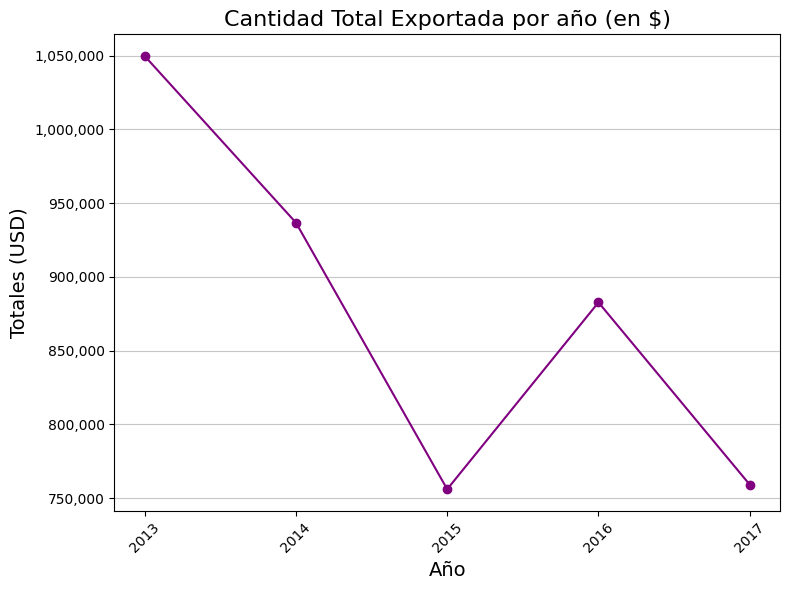

In [24]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Agrupar por año y sumar los valores de 'totales_usd'
importaciones_por_año = df.groupby('año')['totales_usd'].sum().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.plot(importaciones_por_año['año'], importaciones_por_año['totales_usd'], marker='o', color='purple', linestyle='-')

# Personalización de la gráfica
plt.title("Cantidad Total Exportada por año (en $)", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Totales (USD)", fontsize=14)
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Formatear los valores del eje Y para evitar notación científica
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')  # Formato de miles, sin decimales
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(importaciones_por_año['año'], rotation=45)  # Mostrar todos los años en el eje X con rotación si es necesario
plt.tight_layout()  # Ajustar la distribución para evitar solapamientos
plt.show()


# Hipótesis: los ingresos aumentan año a año
## Conclusión: si bien vemos un ligero crecimiento del año 2015 al 2016, en la totalidad del resto de los casos los ingresos disminuyeron, demostrando así que nuestra hipótesis fue errónea. Por ende, lamentablemente no hubo un decrecimiento significativod de los ingresos por exportaciones de frutas.

Ahora vamos a responder a una de las preguntas de Negocio: 1)¿Cuál es el producto con más toneladas exportadas?
Para ello utilizaremos un gráfico de barras

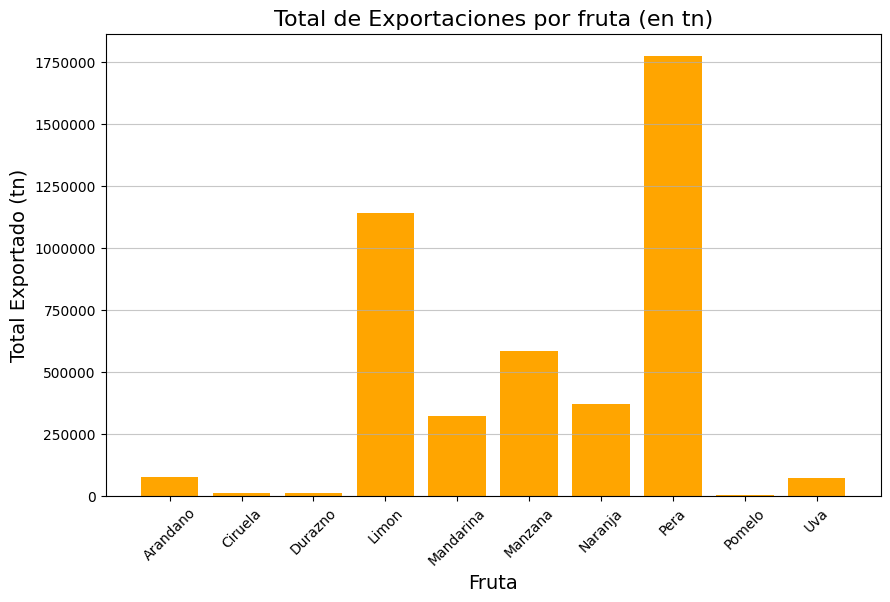

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter #Para evitar que el eje Y muestre una notación cientifica

producto_totales = df_final.groupby('producto')['totales_tn'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(producto_totales['producto'], producto_totales['totales_tn'], color='orange')

# Personalización del gráfico
plt.title("Total de Exportaciones por fruta (en tn)", fontsize=16)
plt.xlabel("Fruta", fontsize=14)
plt.ylabel("Total Exportado (tn)", fontsize=14)
plt.xticks(rotation=45)  # Inclinación del texto para mayor claridad en la visualización
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Evitar notación científica en el eje Y
ax = plt.gca()  # Obtener el objeto Axes actual
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')  # Cambiar el estilo del eje Y a números sin notación cientifíca

# Agregar los valores de cada barra
for bar in bars:
    height = bar.get_height()



# Conclusión pregunta 1:
## Podemos notar fácilmente que el producto "Pera" fue el de mayor exportación

# 2)¿Qué país exportador genera la mayor cantidad de ingresos?
## Para responder esta pregunta eliminaremos el "pais_destino" nombrado como "Otros", ya que no tiene sentido para la pregunta que nos planteamos, puesto que debemos responder con un país en concreto
### En base a lo antes dicho, armaremos un nuevo df que no contará con "Otros", aplicando un filtro

In [38]:
# Eliminar filas donde paisdestino_id es 520 ("Otros") a través de un filtro
df_por_pais = df_final[df_final["pais_destino"] != 'Otros']
df_por_pais.head()



,pais_origen,producto,paisdestino_id,pais_destino,año,unimed_cod,unidad_medida,totales_tn,moneda_cod,moneda,totales_usd
paisorigen_id,,,,,,,,,,,
32,Argentina,Arandano,212,Estados Unidos,2013,tn,Toneladas,7352,USD,Dolares,49637.14
32,Argentina,Arandano,426,Reino Unido,2013,tn,Toneladas,2080,USD,Dolares,15151.50
32,Argentina,Arandano,423,Países Bajos,2013,tn,Toneladas,1091,USD,Dolares,8001.87
32,Argentina,Arandano,438,Alemania,2013,tn,Toneladas,614,USD,Dolares,5041.24
32,Argentina,Arandano,204,Canadá,2013,tn,Toneladas,577,USD,Dolares,4875.80


## Ahora vamos a crear un gráfico en base al nuevo df, para poder responder a nuestra pregunta de Negocio

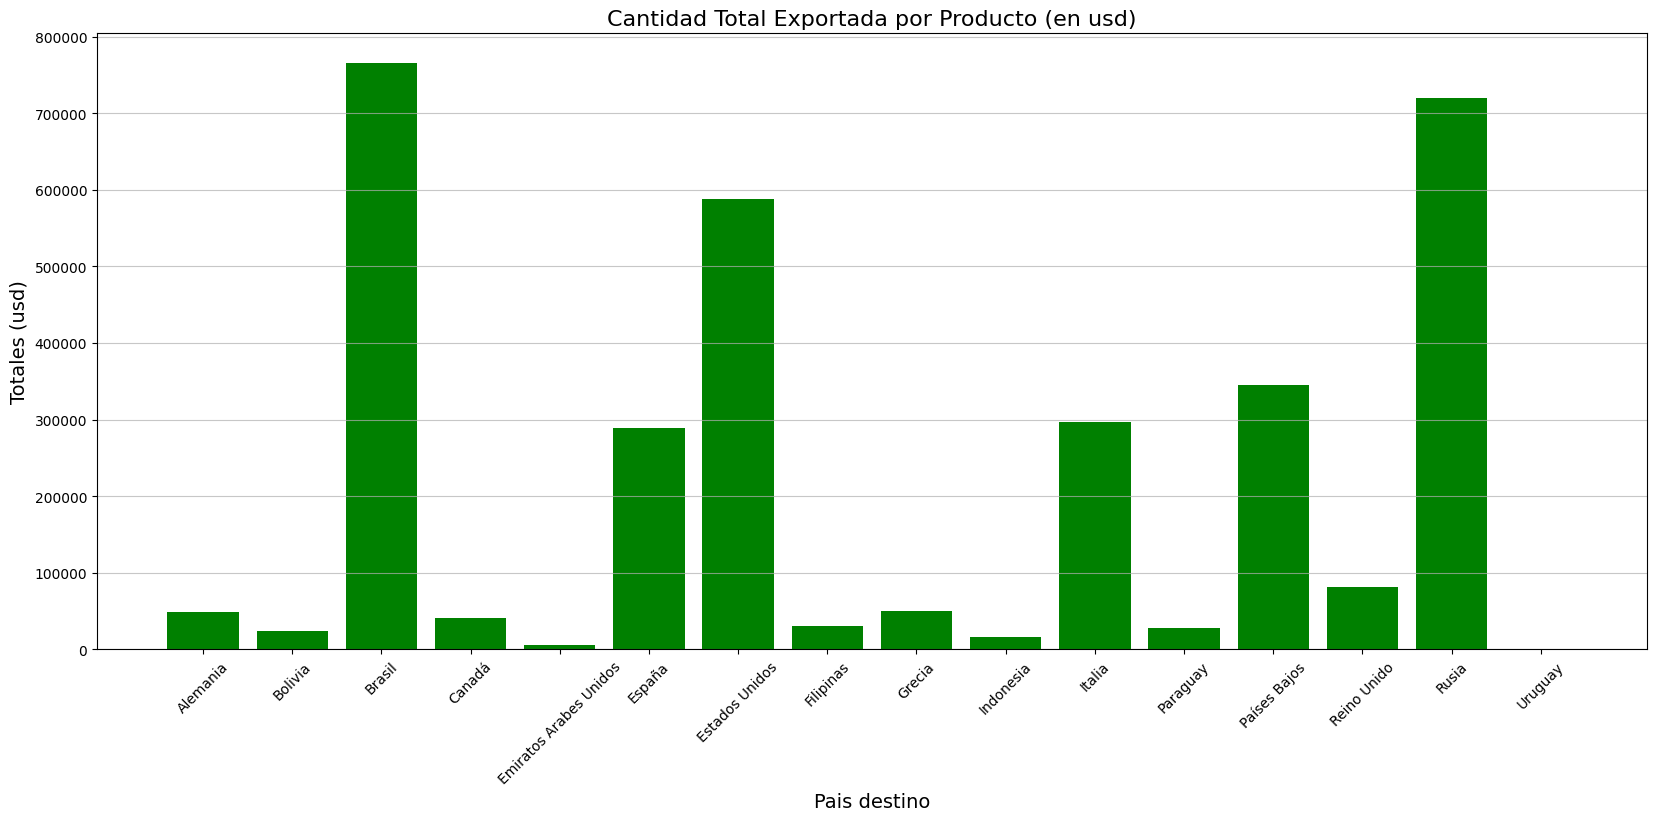

In [37]:
df_por_pais = df_final[df_final["pais_destino"] != 'Otros']
dolares_totales = df_por_pais.groupby('pais_destino')['totales_usd'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(20, 8))  # Tamaño del gráfico
plt.bar(dolares_totales['pais_destino'], dolares_totales['totales_usd'], color='green')

#Personalización del gráfico
plt.title("Cantidad Total Exportada por Producto (en usd)", fontsize=16)
plt.xlabel("Pais destino", fontsize=14)
plt.ylabel("Totales (usd)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

# Conclusión pregunta 2
## El gráfico nos permite observar que Brasil es el país que más ingresos generó, en segundo lugar se ubica Rusia y en tercero Estados Unidos

# Conclusión Final
## El trabajo con el df, la limpieza del mismo al principio del trabajo y la aplicación del filtro necesario al final, fueron formas muy útiles de obtener datos que permitan entender con claridad la inforación a través la creación de gráficos de interpretación sencilla